# Pandas  Vizualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
#see the pre-defined styles provided.
plt.style.available

['seaborn-dark',
 'fast',
 'ggplot',
 'seaborn-colorblind',
 'classic',
 'seaborn-ticks',
 'tableau-colorblind10',
 'seaborn-white',
 'seaborn-paper',
 'seaborn-bright',
 'Solarize_Light2',
 'seaborn-dark-palette',
 'seaborn-talk',
 'seaborn-notebook',
 'grayscale',
 'seaborn',
 'seaborn-deep',
 'fivethirtyeight',
 'bmh',
 'seaborn-muted',
 'seaborn-poster',
 'seaborn-darkgrid',
 '_classic_test',
 'seaborn-pastel',
 'dark_background',
 'seaborn-whitegrid']

In [3]:
# use the 'seaborn-colorblind' style
plt.style.use('seaborn-colorblind')

### DataFrame.plt

In [4]:
np.random.seed(123)

df=pd.DataFrame({'A': np.random.randn(365).cumsum(0),
                 'B': np.random.randn(365).cumsum(0)+20,
                 'C': np.random.randn(365).cumsum(0)-20},
                 index=pd.date_range('1/1/2020', periods=365))
df

,A,B,C
2020-01-01,-1.085631,20.059291,-20.230904
2020-01-02,-0.088285,21.803332,-16.659325
2020-01-03,0.194693,20.835588,-17.055481
2020-01-04,-1.311601,21.255156,-17.093802
2020-01-05,-1.890202,21.462083,-19.518638
...,...,...,...
2020-12-26,-17.039852,36.468465,-61.792064
2020-12-27,-16.366361,36.860543,-59.518959
2020-12-28,-16.780118,37.607936,-59.615350
2020-12-29,-16.104155,37.880671,-61.557482


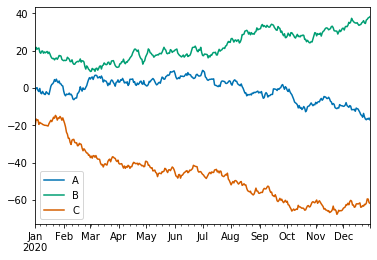

In [5]:
df.plot();

#### Whe can select which plot we want to use by passing it into the 'kind' parameter

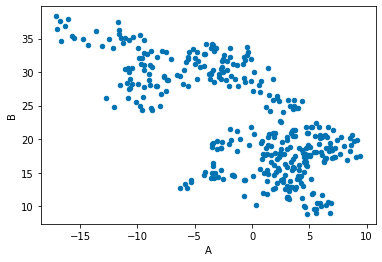

In [6]:
df.plot('A', 'B', kind='scatter');

You can also choose the plor kind by using the 'DataFrame.plot.kind' methods instead of providing the kind keyword argument.

kind:
- line : line plot (default).
- bar : vertical bar plot.
- barh : horizontal bar plot.
- hist : histogram.
- box : boxplot.
- kde : Kernel Density Estimation plot.
- density : same as 'kde'.
- area : area plot.
- pie : pie plot.
- scatter : scatter plot.
- hexbin : hwxbin plot.

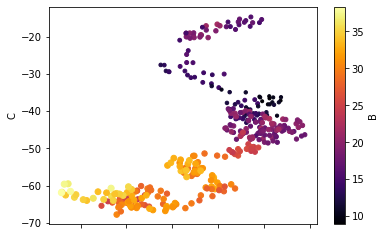

In [7]:
# Create a scatter plor of columns 'A' and 'C', with changing color (c) and size (s) based on column 'B
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='inferno')

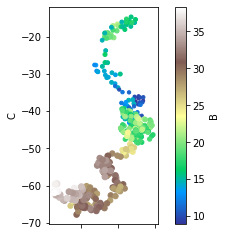

In [8]:
ax = df.plot.scatter('A','C', c='B', s=df['B'], colormap='terrain')
ax.set_aspect('equal')

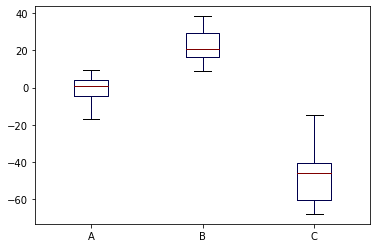

In [9]:
df.plot.box(colormap='seismic')

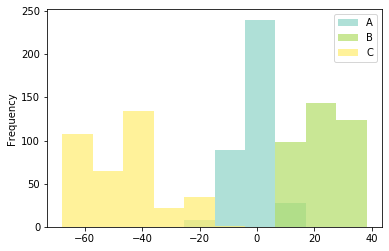

In [10]:
df.plot.hist(alpha=0.7, colormap='Set3')

[Kernel density Estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation) are useful for deriving a smooth continuous function from a given sample

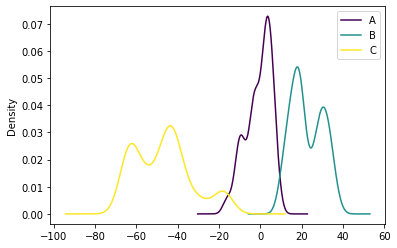

In [11]:
df.plot.kde(colormap='viridis');

### pandas.tools.plotting

[Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [12]:
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
pd.tools.plotting.scatter_matrix(iris);

AttributeError: module 'pandas' has no attribute 'tools'

In [17]:
plt.figure()
pd.tools.plotting.parallel_coordinates(iris, 'Name');

AttributeError: module 'pandas' has no attribute 'tools'

<Figure size 432x288 with 0 Axes>

# Seaborn

In [18]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [19]:
np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1+np.random.normal(60,15,1000), name='v2')

<IPython.core.display.Javascript object>


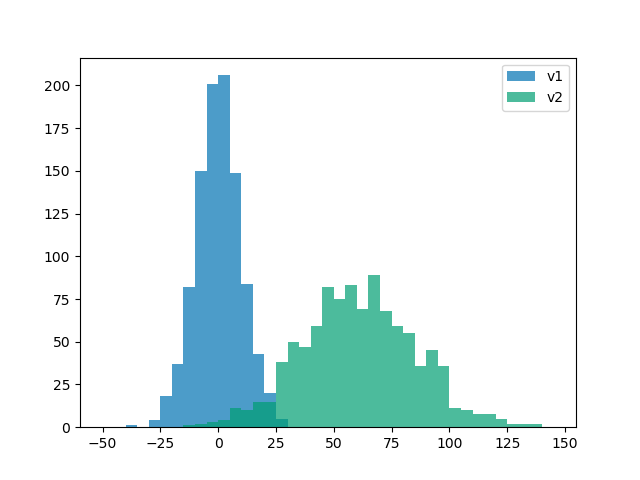

In [20]:
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1');
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2');
plt.legend();

<IPython.core.display.Javascript object>


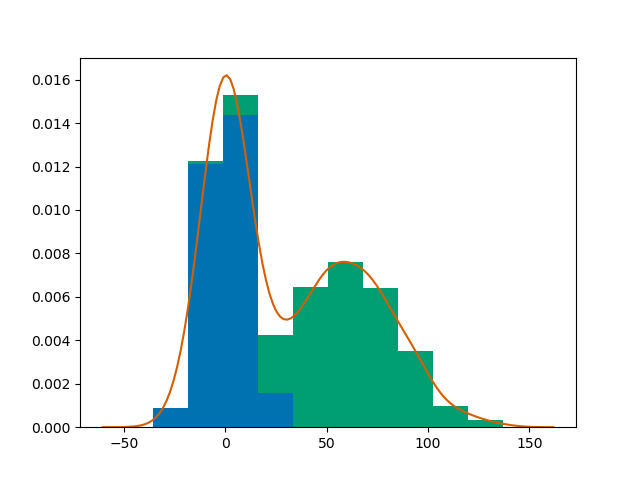

/home/mariuki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
#plt a kernel density estimation over a stacked barchart
plt.figure()
plt.hist([v1,v2], histtype='barstacked', normed=True);
v3=np.concatenate((v1,v2))
sns.kdeplot(v3);

<IPython.core.display.Javascript object>


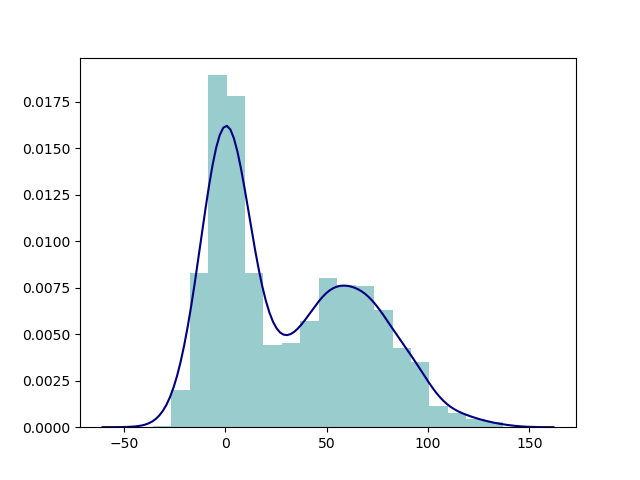

In [24]:
plt.figure()
#we can pass keyword arguments for each individual component of the plot
sns.distplot(v3, hist_kws={'color':'Teal'}, kde_kws={'color':'Navy'});

<IPython.core.display.Javascript object>


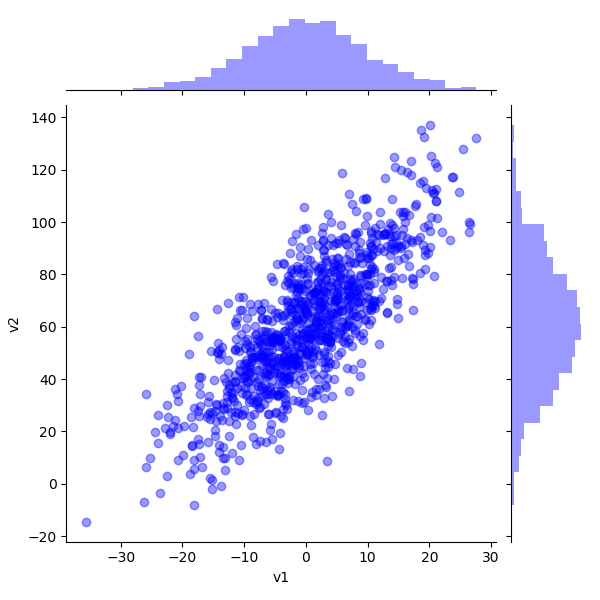

In [28]:
sns.jointplot(v1,v2, alpha=0.4, color='b');

<IPython.core.display.Javascript object>


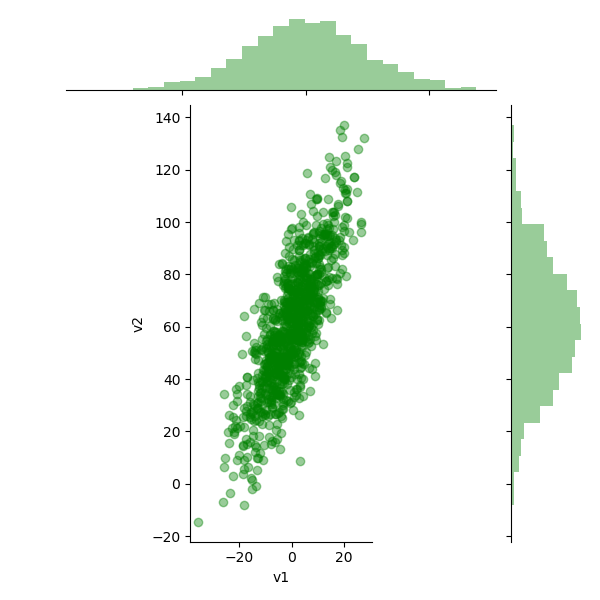

In [32]:
grid = sns.jointplot(v1,v2, alpha=0.4, color='g');
grid.ax_joint.set_aspect('equal')

<IPython.core.display.Javascript object>


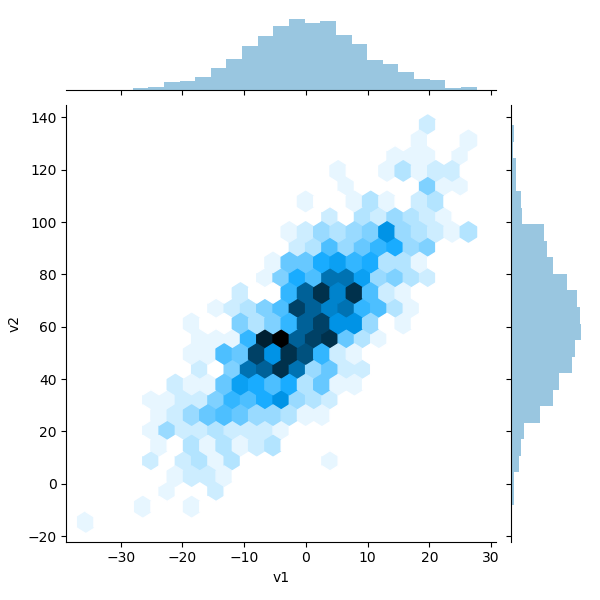

In [33]:
sns.jointplot(v1,v2,kind='hex');

<IPython.core.display.Javascript object>


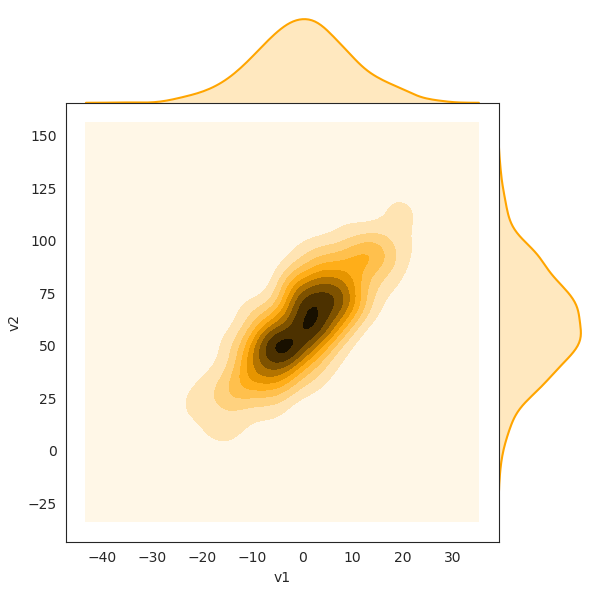

In [37]:
# set the seaborn style for all the following plots
sns.set_style('white')

sns.jointplot(v1,v2,kind='kde', space=0, color='orange');

In [38]:
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<IPython.core.display.Javascript object>


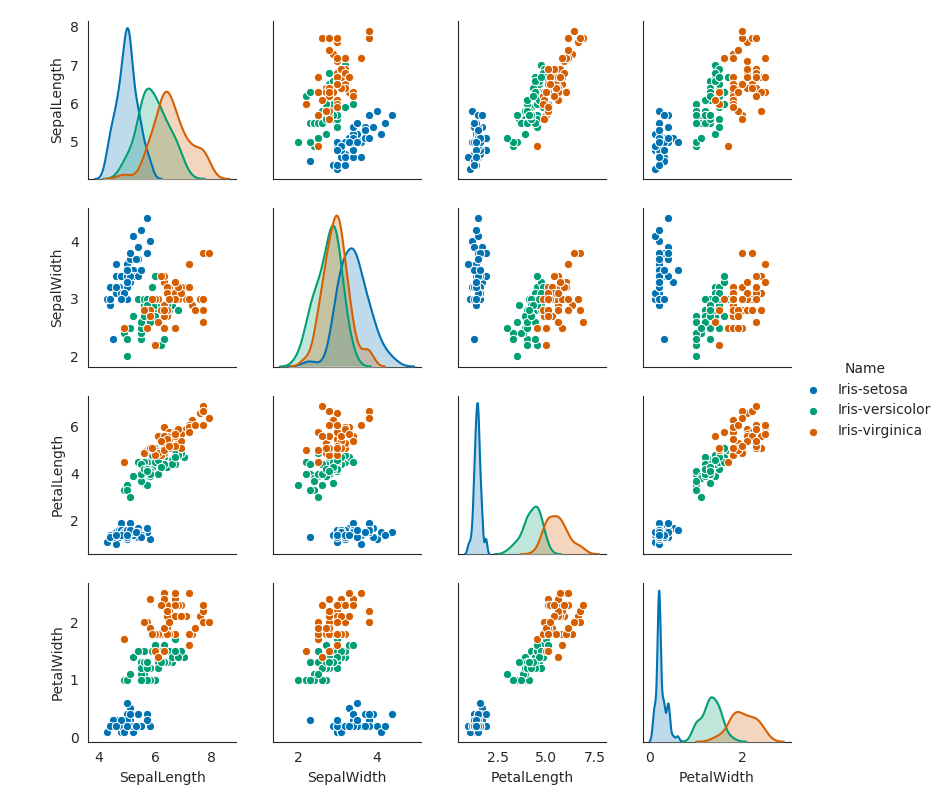

In [40]:
sns.pairplot(iris, hue='Name', diag_kind='kde', height=2);

<IPython.core.display.Javascript object>


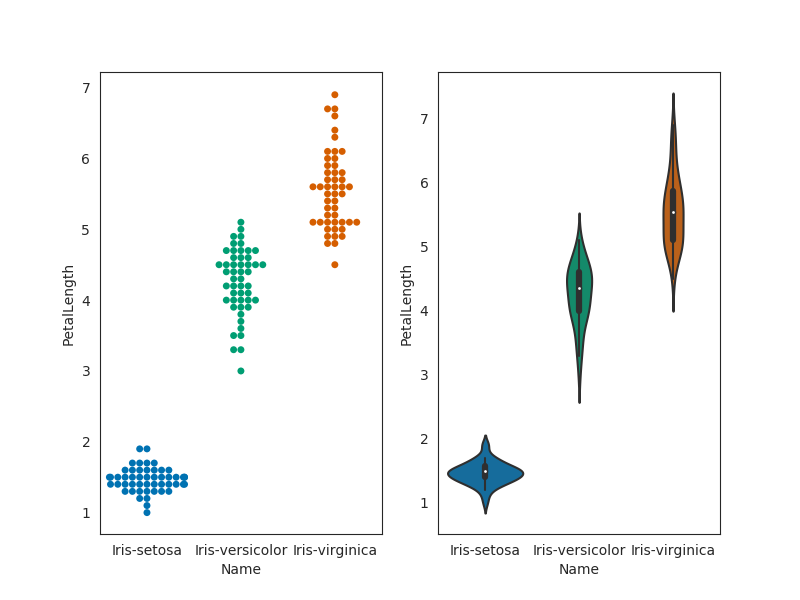

In [43]:
plt.figure(figsize=(8,6))
plt.subplot(121)
sns.swarmplot('Name','PetalLength',data=iris);
plt.subplot(122)
sns.violinplot('Name','PetalLength',data=iris);